In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [13]:
import numpy as np
import pandas as pd

df = pd.read_csv('German.csv')
df.drop('Bad', axis = 1, inplace = True)

In [14]:
subset_1 = df[df['Duration'] <= 12]

In [15]:
subset_1['Purpose'] = subset_1['Purpose'].str.replace('X', str(10))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
X1 = subset_1.drop('Good', axis = 1)
y1 = subset_1['Good']

from sklearn.model_selection import train_test_split
loan_input_train_1, loan_input_test_1, loan_target_train_1, loan_target_test_1 = train_test_split(X1, y1, test_size=0.2)

In [17]:
df_inputs_prepr = loan_input_train_1 # X_train_1
df_targets_prepr = loan_target_train_1 # y_train_1

In [18]:
# Categorical - Checking - 0.47 - Strong Predictor
# Categorical - History - 0.40 - Strong Predictor
# Categorical - Purpose - inf (N/A) - Check WOE plot
# Categorical - Savings - 0.14
# Categorical - Emploed - 0.18
# Categorical - marital - 0.07
# Categorical - Coapp - 0.07
# Categorical - Property - 0.29
# Categorical - Other - 0.13
# Categorical - housing - 0.10
# Categorical - Job - 0.02
# Categorical - Telephone - 0.01
# Categorical - Foreign - inf (N/A) - Check WOE plot

# Numerical - Duration - 0.08
# Numerical - Amount - 0.15 
# Numerical - Installp - 0.06
# Numerical - Resident - 0.0004
# Numerical - Age - 0.38 
# Numerical - Existcr - 0.03
# Numerical - Depends - 0.01

In [346]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis =1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(by = ['WoE'])
    df.reset_index(drop = True)
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [347]:
df_temp = woe_discrete(df_inputs_prepr, 'History', df_targets_prepr)
df_temp

,History,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
1,1,12,0.416667,0.041812,5.0,7.0,0.021834,0.120690,-1.709751,0.401915
0,0,8,0.500000,0.027875,4.0,4.0,0.017467,0.068966,-1.373279,0.401915
2,2,167,0.784431,0.581882,131.0,36.0,0.572052,0.620690,-0.081601,0.401915
3,3,11,0.818182,0.038328,9.0,2.0,0.039301,0.034483,0.130798,0.401915
4,4,89,0.898876,0.310105,80.0,9.0,0.349345,0.155172,0.811523,0.401915


In [348]:
def woe_continous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis =1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(by = ['WoE'])
    #df.reset_index(drop = True)
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [349]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

# Duration

In [350]:
df_inputs_prepr['Duration'].describe()

count    287.000000
mean       9.818815
std        2.516087
min        4.000000
25%        8.000000
50%       11.000000
75%       12.000000
max       12.000000
Name: Duration, dtype: float64

In [351]:
df_temp = woe_continous(df_inputs_prepr, 'Duration', df_targets_prepr)
df_temp

,Duration,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,4,4,1.000000,0.013937,4.0,0.0,0.017467,0.000000,inf,inf
1,5,1,1.000000,0.003484,1.0,0.0,0.004367,0.000000,inf,inf
2,6,62,0.854839,0.216028,53.0,9.0,0.231441,0.155172,0.399788,inf
3,7,3,1.000000,0.010453,3.0,0.0,0.013100,0.000000,inf,inf
4,8,7,0.857143,0.024390,6.0,1.0,0.026201,0.017241,0.418480,inf
5,9,39,0.692308,0.135889,27.0,12.0,0.117904,0.206897,-0.562349,inf
6,10,23,0.869565,0.080139,20.0,3.0,0.087336,0.051724,0.523841,inf
7,11,9,1.000000,0.031359,9.0,0.0,0.039301,0.000000,inf,inf
8,12,139,0.762590,0.484321,106.0,33.0,0.462882,0.568966,-0.206347,inf


In [352]:
df_temp['n_obs'].sum()

287

In [353]:
287 * 0.05

14.350000000000001

In [362]:
# To Capture 5% of the data in the binning
df_inputs_prepr['Duration_factor'] = pd.cut(df_inputs_prepr['Duration'], 4)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [363]:
df_temp = woe_continous(df_inputs_prepr, 'Duration_factor', df_targets_prepr)
df_temp

,Duration_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(3.992, 6.0]",67,0.865672,0.233449,58.0,9.0,0.253275,0.155172,0.489939,0.086919
1,"(6.0, 8.0]",10,0.900000,0.034843,9.0,1.0,0.039301,0.017241,0.823946,0.086919
2,"(8.0, 10.0]",62,0.758065,0.216028,47.0,15.0,0.205240,0.258621,-0.231182,0.086919
3,"(10.0, 12.0]",148,0.777027,0.515679,115.0,33.0,0.502183,0.568966,-0.124854,0.086919


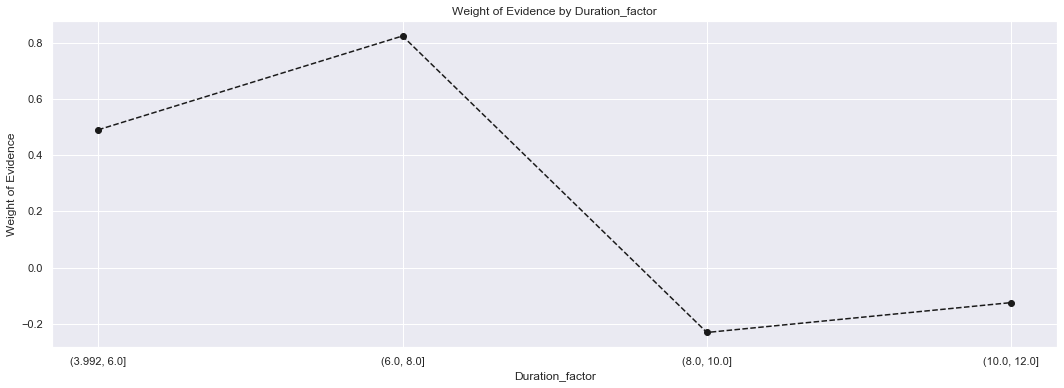

In [364]:
plot_by_woe(df_temp)

# Amount

In [527]:
df_inputs_prepr['Amount'].describe()

count      287.000000
mean      1853.498258
std       1614.905931
min        250.000000
25%       1042.500000
50%       1402.000000
75%       2141.500000
max      14896.000000
Name: Amount, dtype: float64

In [528]:
df_temp = woe_continous(df_inputs_prepr, 'Amount', df_targets_prepr)
df_temp

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Amount,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,250,1,1.0,0.003484,1.0,0.0,0.004367,0.000000,inf,inf
1,339,1,1.0,0.003484,1.0,0.0,0.004367,0.000000,inf,inf
2,343,1,1.0,0.003484,1.0,0.0,0.004367,0.000000,inf,inf
3,362,1,1.0,0.003484,1.0,0.0,0.004367,0.000000,inf,inf
4,368,1,1.0,0.003484,1.0,0.0,0.004367,0.000000,inf,inf
...,...,...,...,...,...,...,...,...,...,...
270,6761,1,1.0,0.003484,1.0,0.0,0.004367,0.000000,inf,inf
271,7228,1,1.0,0.003484,1.0,0.0,0.004367,0.000000,inf,inf
272,7308,1,1.0,0.003484,1.0,0.0,0.004367,0.000000,inf,inf
273,14555,1,0.0,0.003484,0.0,1.0,0.000000,0.017241,-inf,inf


In [529]:
df_temp['n_obs'].sum()

287

In [530]:
287*0.05

14.350000000000001

In [531]:
df_inputs_prepr['Amount_factor'] = pd.cut(df_inputs_prepr['Amount'], 10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [532]:
df_temp = woe_continous(df_inputs_prepr, 'Amount_factor', df_targets_prepr)
df_temp

,Amount_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(235.354, 1714.6]",182,0.780220,0.634146,142.0,40.0,0.620087,0.689655,-0.106331,inf
1,"(1714.6, 3179.2]",71,0.873239,0.247387,62.0,9.0,0.270742,0.155172,0.556631,inf
2,"(3179.2, 4643.8]",20,0.850000,0.069686,17.0,3.0,0.074236,0.051724,0.361322,inf
3,"(4643.8, 6108.4]",7,0.714286,0.024390,5.0,2.0,0.021834,0.034483,-0.456988,inf
4,"(6108.4, 7573.0]",5,0.600000,0.017422,3.0,2.0,0.013100,0.034483,-0.967814,inf
5,"(7573.0, 9037.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
6,"(9037.6, 10502.2]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
7,"(10502.2, 11966.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
8,"(11966.8, 13431.4]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,inf
9,"(13431.4, 14896.0]",2,0.000000,0.006969,0.0,2.0,0.000000,0.034483,-inf,inf


In [549]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['Amount'] <= 4000, :]

In [550]:
df_inputs_prepr_temp['Amount_factor'] = pd.cut(df_inputs_prepr_temp['Amount'], 5)
df_temp = woe_continous(df_inputs_prepr_temp, 'Amount_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Amount_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(246.311, 987.8]",69,0.710145,0.253676,49.0,20.0,0.221719,0.392157,-0.570249,0.176046
1,"(987.8, 1725.6]",113,0.823009,0.415441,93.0,20.0,0.420814,0.392157,0.070530,0.176046
2,"(1725.6, 2463.4]",52,0.884615,0.191176,46.0,6.0,0.208145,0.117647,0.570545,0.176046
3,"(2463.4, 3201.2]",20,0.850000,0.073529,17.0,3.0,0.076923,0.058824,0.268264,0.176046
4,"(3201.2, 3939.0]",18,0.888889,0.066176,16.0,2.0,0.072398,0.039216,0.613104,0.176046


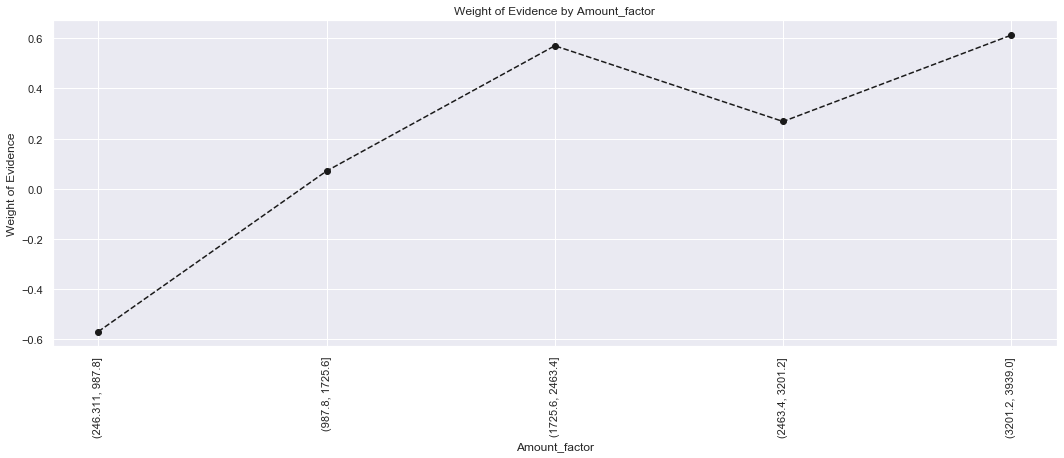

In [551]:
plot_by_woe(df_temp, 90)

# Installp

In [493]:
df_inputs_prepr['Installp'].describe()

count    287.000000
mean       2.797909
std        1.168166
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Installp, dtype: float64

In [494]:
df_temp = woe_continous(df_inputs_prepr, 'Installp', df_targets_prepr)
df_temp

,Installp,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,1,54,0.833333,0.188153,45.0,9.0,0.196507,0.155172,0.236159,0.128586
1,2,68,0.852941,0.236934,58.0,10.0,0.253275,0.172414,0.384579,0.128586
2,3,47,0.851064,0.163763,40.0,7.0,0.174672,0.120690,0.369690,0.128586
3,4,118,0.728814,0.411150,86.0,32.0,0.375546,0.551724,-0.384668,0.128586


In [495]:
df_temp['n_obs'].sum() * 0.05

14.350000000000001

In [496]:
df_inputs_prepr['Installp_factor'] = pd.cut(df_inputs_prepr['Installp'], 2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [497]:
df_temp = woe_continous(df_inputs_prepr, 'Installp_factor', df_targets_prepr)
df_temp

,Installp_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(0.997, 2.5]",122,0.844262,0.425087,103.0,19.0,0.449782,0.327586,0.317011,0.063245
1,"(2.5, 4.0]",165,0.763636,0.574913,126.0,39.0,0.550218,0.672414,-0.200559,0.063245


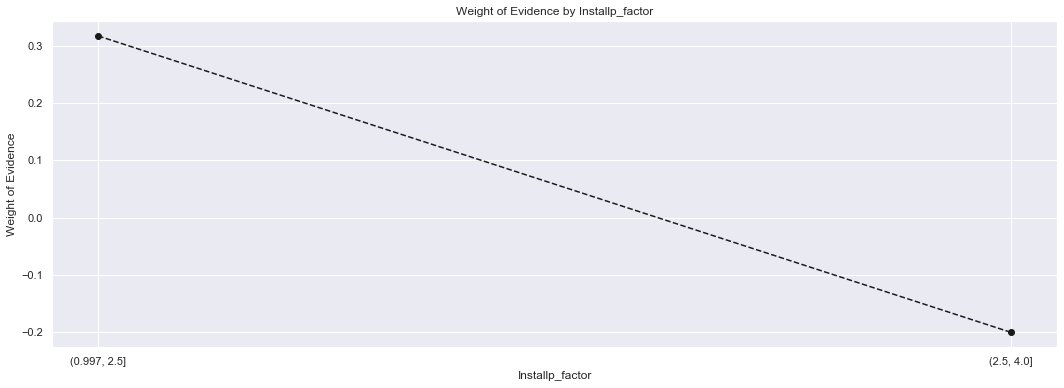

In [498]:
plot_by_woe(df_temp)

# Resident

In [499]:
df_inputs_prepr['Resident'].describe()

count    287.000000
mean       2.773519
std        1.112986
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Resident, dtype: float64

In [500]:
df_temp = woe_continous(df_inputs_prepr, 'Resident', df_targets_prepr)
df_temp

,Resident,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,1,43,0.767442,0.149826,33.0,10.0,0.144105,0.172414,-0.179357,0.017531
1,2,88,0.818182,0.306620,72.0,16.0,0.314410,0.275862,0.130798,0.017531
2,3,47,0.765957,0.163763,36.0,11.0,0.157205,0.189655,-0.187655,0.017531
3,4,109,0.807339,0.379791,88.0,21.0,0.384279,0.362069,0.059535,0.017531


In [501]:
df_temp['n_obs'].sum() * 0.05

14.350000000000001

In [502]:
df_inputs_prepr['Resident_factor'] = pd.cut(df_inputs_prepr['Resident'], 2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [503]:
df_temp = woe_continous(df_inputs_prepr, 'Resident_factor', df_targets_prepr)
df_temp

,Resident_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(0.997, 2.5]",131,0.801527,0.456446,105.0,26.0,0.458515,0.448276,0.022585,0.000423
1,"(2.5, 4.0]",156,0.794872,0.543554,124.0,32.0,0.541485,0.551724,-0.018733,0.000423


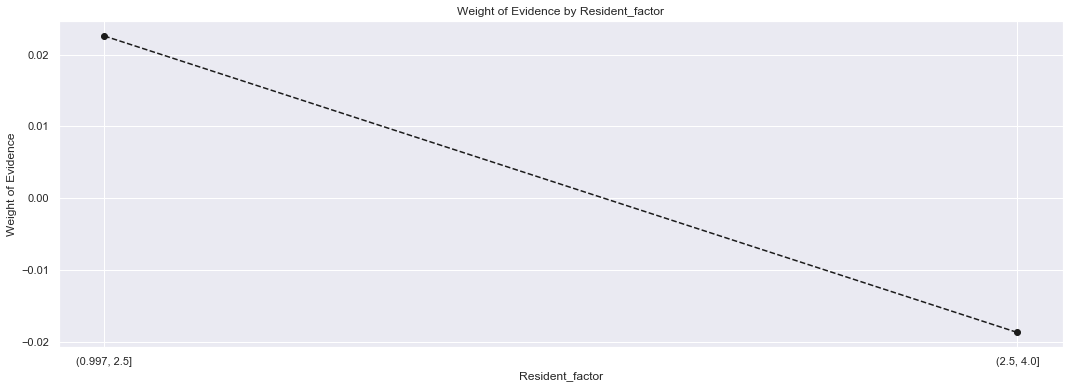

In [504]:
plot_by_woe(df_temp)

# Age

In [505]:
df_inputs_prepr['Age'].describe()

count    287.000000
mean      36.442509
std       12.405560
min       19.000000
25%       26.500000
50%       34.000000
75%       44.000000
max       75.000000
Name: Age, dtype: float64

In [506]:
df_temp = woe_continous(df_inputs_prepr, 'Age', df_targets_prepr)
df_temp

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,19,2,0.500000,0.006969,1.0,1.0,0.004367,0.017241,-1.373279,inf
1,20,6,0.666667,0.020906,4.0,2.0,0.017467,0.034483,-0.680132,inf
2,21,4,0.750000,0.013937,3.0,1.0,0.013100,0.017241,-0.274667,inf
3,22,10,0.500000,0.034843,5.0,5.0,0.021834,0.086207,-1.373279,inf
4,23,15,0.800000,0.052265,12.0,3.0,0.052402,0.051724,0.013015,inf
5,24,10,0.700000,0.034843,7.0,3.0,0.030568,0.051724,-0.525981,inf
6,25,9,0.444444,0.031359,4.0,5.0,0.017467,0.086207,-1.596423,inf
7,26,16,0.875000,0.055749,14.0,2.0,0.061135,0.034483,0.572631,inf
8,27,12,0.833333,0.041812,10.0,2.0,0.043668,0.034483,0.236159,inf
9,28,12,0.583333,0.041812,7.0,5.0,0.030568,0.086207,-1.036807,inf


In [507]:
df_temp['n_obs'].sum() * 0.05

14.350000000000001

In [508]:
df_inputs_prepr['Age_factor'] = pd.cut(df_inputs_prepr['Age'], 10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [509]:
df_temp = woe_continous(df_inputs_prepr, 'Age_factor', df_targets_prepr)
df_temp

,Age_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(18.944, 24.6]",47,0.680851,0.163763,32.0,15.0,0.139738,0.258621,-0.615593,0.393236
1,"(24.6, 30.2]",66,0.727273,0.229965,48.0,18.0,0.209607,0.310345,-0.392450,0.393236
2,"(30.2, 35.8]",45,0.800000,0.156794,36.0,9.0,0.157205,0.155172,0.013015,0.393236
3,"(35.8, 41.4]",46,0.934783,0.160279,43.0,3.0,0.187773,0.051724,1.289309,0.393236
4,"(41.4, 47.0]",29,0.827586,0.101045,24.0,5.0,0.104803,0.086207,0.195337,0.393236
5,"(47.0, 52.6]",25,0.920000,0.087108,23.0,2.0,0.100437,0.034483,1.069068,0.393236
6,"(52.6, 58.2]",9,0.666667,0.031359,6.0,3.0,0.026201,0.051724,-0.680132,0.393236
7,"(58.2, 63.8]",6,0.833333,0.020906,5.0,1.0,0.021834,0.017241,0.236159,0.393236
8,"(63.8, 69.4]",9,0.888889,0.031359,8.0,1.0,0.034934,0.017241,0.706163,0.393236
9,"(69.4, 75.0]",5,0.800000,0.017422,4.0,1.0,0.017467,0.017241,0.013015,0.393236


In [510]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['Age'] <= 52, :]

In [511]:
df_inputs_prepr_temp['Age_factor'] = pd.cut(df_inputs_prepr_temp['Age'], 7)
df_temp = woe_continous(df_inputs_prepr_temp, 'Age_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(18.967, 23.714]",37,0.675676,0.143411,25.0,12.0,0.121359,0.230769,-0.642663,0.386197
1,"(23.714, 28.429]",59,0.711864,0.228682,42.0,17.0,0.203883,0.326923,-0.472176,0.386197
2,"(28.429, 33.143]",42,0.761905,0.162791,32.0,10.0,0.155340,0.192308,-0.213482,0.386197
3,"(33.143, 37.857]",35,0.885714,0.135659,31.0,4.0,0.150485,0.076923,0.671060,0.386197
4,"(37.857, 42.571]",38,0.921053,0.147287,35.0,3.0,0.169903,0.057692,1.080103,0.386197
5,"(42.571, 47.286]",22,0.818182,0.085271,18.0,4.0,0.087379,0.076923,0.127445,0.386197
6,"(47.286, 52.0]",25,0.920000,0.096899,23.0,2.0,0.111650,0.038462,1.065715,0.386197


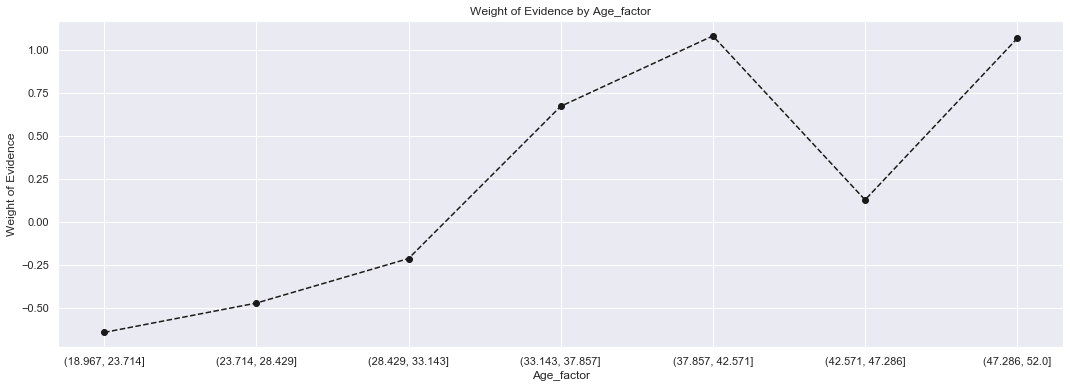

In [512]:
plot_by_woe(df_temp)

# Existcr

In [513]:
df_inputs_prepr['Existcr'].describe()

count    287.000000
mean       1.376307
std        0.583452
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Existcr, dtype: float64

In [514]:
df_temp = woe_continous(df_inputs_prepr, 'Existcr', df_targets_prepr)
df_temp

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Existcr,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,1,193,0.777202,0.672474,150.0,43.0,0.655022,0.741379,-0.123844,inf
1,2,81,0.839506,0.282230,68.0,13.0,0.296943,0.224138,0.281279,inf
2,3,12,0.916667,0.041812,11.0,1.0,0.048035,0.017241,1.024616,inf
3,4,1,0.000000,0.003484,0.0,1.0,0.000000,0.017241,-inf,inf


In [519]:
df_inputs_prepr['Existcr_factor'] = pd.cut(df_inputs_prepr['Existcr'], 2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [520]:
df_temp = woe_continous(df_inputs_prepr, 'Existcr_factor', df_targets_prepr)
df_temp

,Existcr_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(0.997, 2.5]",274,0.795620,0.954704,218.0,56.0,0.951965,0.965517,-0.014136,0.004684
1,"(2.5, 4.0]",13,0.846154,0.045296,11.0,2.0,0.048035,0.034483,0.331469,0.004684


In [521]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['Existcr'] <= 2, :]

In [522]:
df_inputs_prepr_temp['Existcr_factor'] = pd.cut(df_inputs_prepr_temp['Existcr'], 2)
df_temp = woe_continous(df_inputs_prepr_temp, 'Existcr_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Existcr_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,"(0.999, 1.5]",193,0.777202,0.70438,150.0,43.0,0.688073,0.767857,-0.109708,0.032322
1,"(1.5, 2.0]",81,0.839506,0.29562,68.0,13.0,0.311927,0.232143,0.295415,0.032322


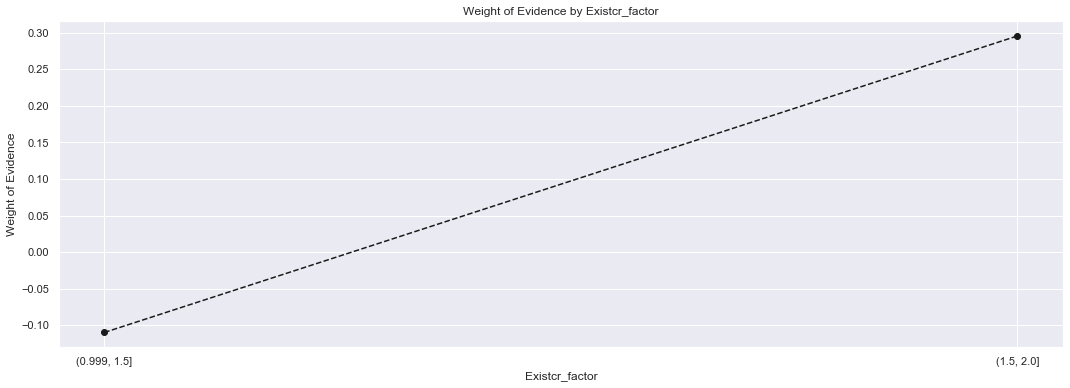

In [523]:
plot_by_woe(df_temp)

# Depends

In [524]:
df_inputs_prepr['Depends'].describe()

count    287.000000
mean       1.191638
std        0.394277
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: Depends, dtype: float64

In [525]:
df_temp = woe_continous(df_inputs_prepr, 'Depends', df_targets_prepr)
df_temp

,Depends,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV
0,1,232,0.788793,0.808362,183.0,49.0,0.799127,0.844828,-0.055613,0.014339
1,2,55,0.836364,0.191638,46.0,9.0,0.200873,0.155172,0.258138,0.014339


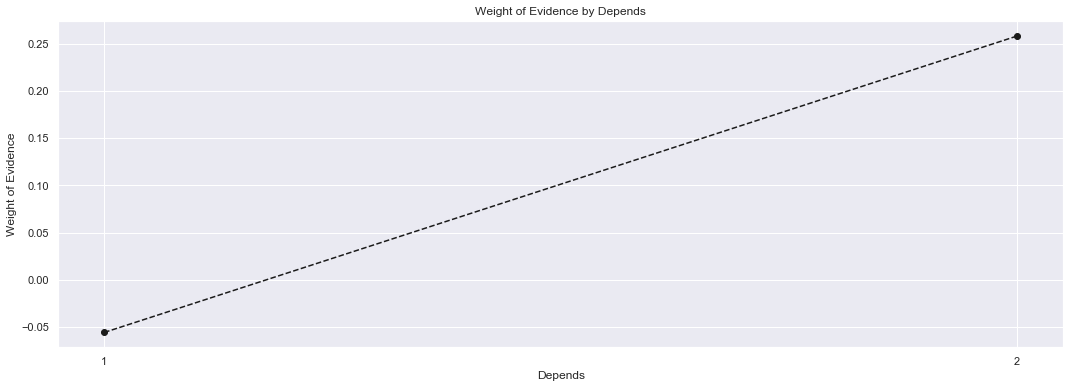

In [526]:
plot_by_woe(df_temp)